In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coursera_data = pd.read_csv("coursera_courses.csv")
coursera_data

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,492,Beginner,https://www.coursera.org/specializations/sscp-...,"6,958","['Risk Management', 'Access Control', 'Asset',...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,51,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,531","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,62,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,377",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,517,Intermediate,https://www.coursera.org/learn/crash-course-in...,"39,004","['Instrumental Variable', 'Propensity Score Ma...",[],We have all heard the phrase “correlation does...
4,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,4.6k,Intermediate,https://www.coursera.org/learn/etudier-en-france,"519,333",[],[],Ce cours de français de niveau intermédiaire B...
996,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,1.2k,Beginner,https://www.coursera.org/professional-certific...,"7,630","['Медійна реклама', 'Маркетинг', 'Маркетинг ел...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,156,Beginner,https://www.coursera.org/professional-certific...,"2,701","['مؤثرات عرض البيانات (DataViz)', 'R Markdown'...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...
998,用 Python 做商管程式設計（一）(Programming for Business C...,National Taiwan University,Course,1 - 3 Months,4.9,814,Beginner,https://www.coursera.org/learn/pbc1,"38,595",[],[],本系列課程從零開始，教授一般認為最適合初學者的程式語言「Python」，目標是讓大家在完成本...


In [3]:
new_data = coursera_data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              958 non-null    object 
 1   course_organization       958 non-null    object 
 2   course_certificate_type   958 non-null    object 
 3   course_time               958 non-null    object 
 4   course_rating             958 non-null    float64
 5   course_reviews_num        958 non-null    object 
 6   course_difficulty         958 non-null    object 
 7   course_url                958 non-null    object 
 8   course_students_enrolled  958 non-null    object 
 9   course_skills             958 non-null    object 
 10  course_summary            958 non-null    object 
 11  course_description        958 non-null    object 
dtypes: float64(1), object(11)
memory usage: 97.3+ KB


In [4]:
new_data.drop_duplicates()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              958 non-null    object 
 1   course_organization       958 non-null    object 
 2   course_certificate_type   958 non-null    object 
 3   course_time               958 non-null    object 
 4   course_rating             958 non-null    float64
 5   course_reviews_num        958 non-null    object 
 6   course_difficulty         958 non-null    object 
 7   course_url                958 non-null    object 
 8   course_students_enrolled  958 non-null    object 
 9   course_skills             958 non-null    object 
 10  course_summary            958 non-null    object 
 11  course_description        958 non-null    object 
dtypes: float64(1), object(11)
memory usage: 97.3+ KB


In [5]:
organization = coursera_data["course_organization"].value_counts().reset_index()
organization.rename(columns={'index':'organization', 'course_organization':'# course'}, inplace=True)
print(organization.head())
print()
print(len(organization))

                 organization  # course
0                      Google        96
1                         IBM        78
2  University of Pennsylvania        55
3             DeepLearning.AI        43
4                Google Cloud        35

159


In [6]:
organizationSup1 = organization[organization["# course"] > 1]
print(organizationSup1.head(10))
print()
print(len(organizationSup1))

                                 organization  # course
0                                      Google        96
1                                         IBM        78
2                  University of Pennsylvania        55
3                             DeepLearning.AI        43
4                                Google Cloud        35
5                      University of Michigan        34
6  University of Illinois at Urbana-Champaign        29
7              University of Colorado Boulder        28
8                    Johns Hopkins University        26
9                             Duke University        25

97


In [7]:
# proportion of organization with only one course
p1 = (159-97) / 159 * 100
print("Proportion of organization with only one course:", round(p1, 2), "%")

Proportion of organization with only one course: 38.99 %


In [8]:
organizationTOP10 = organization[organization["# course"] >= 25]
print(organizationTOP10)
print()
print(len(organizationTOP10))

                                 organization  # course
0                                      Google        96
1                                         IBM        78
2                  University of Pennsylvania        55
3                             DeepLearning.AI        43
4                                Google Cloud        35
5                      University of Michigan        34
6  University of Illinois at Urbana-Champaign        29
7              University of Colorado Boulder        28
8                    Johns Hopkins University        26
9                             Duke University        25

10


In [60]:
google_prop = 96/958*100
google_prop

10.020876826722338

In [61]:
ibm_prop = 78/958*100
ibm_prop

8.1419624217119

In [62]:
penn_prop = 55/958*100
penn_prop

5.741127348643007

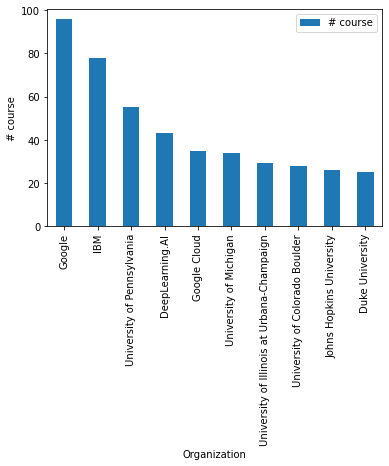

In [9]:
#sns.barplot(data=organizationTOP10)
ax = organizationTOP10.plot.bar()
plt.xlabel("Organization")
plt.ylabel("# course")
#plt.title("Top 10 of course organization")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # choose which x locations to have ticks
ax.set_xticklabels(["Google", "IBM", "University of Pennsylvania", "DeepLearning.AI", "Google Cloud", \
            "University of Michigan", "University of Illinois at Urbana-Champaign", "University of Colorado Boulder", \
           "Johns Hopkins University", "Duke University"])
plt.savefig('top10organization', bbox_inches='tight')
plt.show()

In [10]:
# type of certification proposed in coursera
certificat_type = coursera_data["course_certificate_type"].value_counts()
certificat_type

Course                      488
Specialization              397
Professional Certificate    104
Guided Project               11
Name: course_certificate_type, dtype: int64

In [37]:
course_prop = 488/958*100
course_prop

50.939457202505224

In [38]:
spe_prop = 397/958*100
spe_prop

41.44050104384134

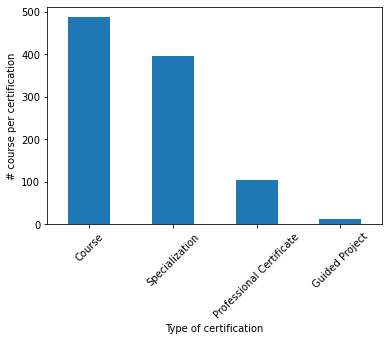

In [11]:
# visualization of the certificat type
certificat_type.plot.bar()
plt.xlabel("Type of certification")
plt.ylabel("# course per certification")
#plt.title("Number of course per certification type")
plt.xticks(rotation=45)
plt.savefig('certificationType', bbox_inches='tight')
plt.show()

In [12]:
# course time
# type of certification proposed in coursera
courseTime = coursera_data["course_time"].value_counts()
courseTime

3 - 6 Months         460
1 - 3 Months         333
1 - 4 Weeks          196
Less Than 2 Hours     11
Name: course_time, dtype: int64

In [39]:
three_prop = 460/958*100
three_prop

48.01670146137787

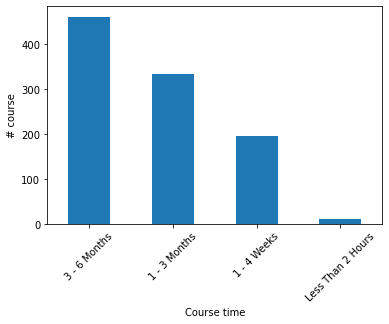

In [13]:
# visualization of the certificat type
courseTime.plot.bar()
plt.xlabel("Course time")
plt.ylabel("# course")
#plt.title("Number of course per time")
plt.xticks(rotation=45)
plt.savefig('time.png', bbox_inches='tight')
plt.show()

In [14]:
time = courseTime.to_frame().reset_index()
time.rename(columns={"index":"course_time", "course_time":"Nb_course"}, inplace=True)
time

,course_time,Nb_course
0,3 - 6 Months,460
1,1 - 3 Months,333
2,1 - 4 Weeks,196
3,Less Than 2 Hours,11


In [56]:
time["Proportion"] = time["Nb_course"]/958*100
time

,course_time,Nb_course,Proportion
0,3 - 6 Months,460,48.016701
1,1 - 3 Months,333,34.759916
2,1 - 4 Weeks,196,20.459290
3,Less Than 2 Hours,11,1.148225


C:\Users\User\AppData\Local\Temp\ipykernel_5240\2796818469.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = coursera_data.corr()


<Axes: >

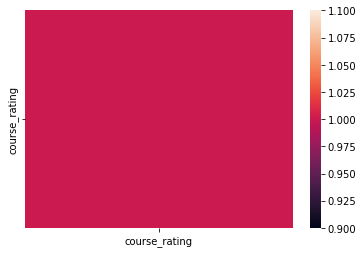

In [15]:
correlation_data = coursera_data.corr()
sns.heatmap(data=correlation_data)

In [16]:
courseDifficulty = coursera_data["course_difficulty"].value_counts()
courseDifficulty

Beginner        685
Intermediate    199
Mixed            80
Advanced         36
Name: course_difficulty, dtype: int64

In [35]:
beg_prop = 685/958*100
beg_prop

71.50313152400834

In [36]:
adv_prop = 36/958*100
adv_prop

3.7578288100208765

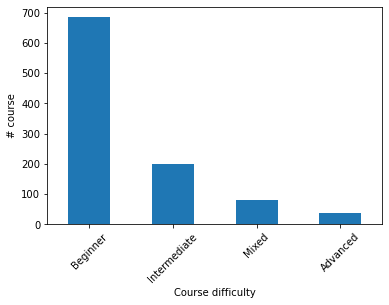

In [17]:
# visualization of the course per difficulty
courseDifficulty.plot.bar()
plt.xlabel("Course difficulty")
plt.ylabel("# course")
#plt.title("Number of course per difficulty")
plt.xticks(rotation=45)
plt.savefig('courseDifficulty', bbox_inches='tight')
plt.show()

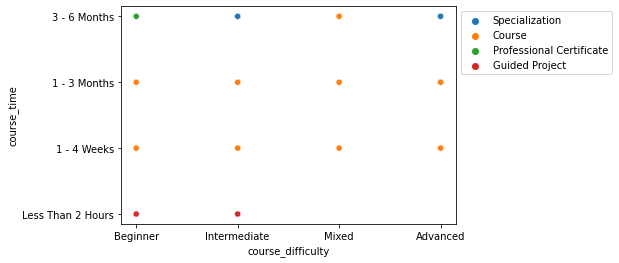

In [59]:
sns.scatterplot(data=coursera_data, x="course_difficulty", y="course_time", hue="course_certificate_type")
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('courseraCourses', bbox_inches='tight')
plt.show()

In [19]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              958 non-null    object 
 1   course_organization       958 non-null    object 
 2   course_certificate_type   958 non-null    object 
 3   course_time               958 non-null    object 
 4   course_rating             958 non-null    float64
 5   course_reviews_num        958 non-null    object 
 6   course_difficulty         958 non-null    object 
 7   course_url                958 non-null    object 
 8   course_students_enrolled  958 non-null    object 
 9   course_skills             958 non-null    object 
 10  course_summary            958 non-null    object 
 11  course_description        958 non-null    object 
dtypes: float64(1), object(11)
memory usage: 97.3+ KB


In [20]:
# convert course_students_enrolled to integer
new_data["course_students_enrolled"] = new_data["course_students_enrolled"].str.replace(",", "")

C:\Users\User\AppData\Local\Temp\ipykernel_5240\275541663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["course_students_enrolled"] = new_data["course_students_enrolled"].str.replace(",", "")


In [21]:
courseStudent1 = new_data["course_students_enrolled"].value_counts()
courseStudent1

56242     2
3201      2
40679     2
54602     2
6958      1
         ..
17743     1
29088     1
52576     1
213625    1
10432     1
Name: course_students_enrolled, Length: 954, dtype: int64

In [22]:
new_data = new_data.astype({"course_students_enrolled": int})
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              958 non-null    object 
 1   course_organization       958 non-null    object 
 2   course_certificate_type   958 non-null    object 
 3   course_time               958 non-null    object 
 4   course_rating             958 non-null    float64
 5   course_reviews_num        958 non-null    object 
 6   course_difficulty         958 non-null    object 
 7   course_url                958 non-null    object 
 8   course_students_enrolled  958 non-null    int32  
 9   course_skills             958 non-null    object 
 10  course_summary            958 non-null    object 
 11  course_description        958 non-null    object 
dtypes: float64(1), int32(1), object(10)
memory usage: 93.6+ KB


In [50]:
typeVSstudent = new_data.groupby("course_certificate_type")["course_students_enrolled"].sum()
typeVSstudent = typeVSstudent.sort_values(ascending=False)
typeVSstudent

course_certificate_type
Course                      86236814
Specialization              36122321
Professional Certificate    13622208
Guided Project               1703347
Name: course_students_enrolled, dtype: int32

In [53]:
total = 86236814 + 36122321 + 13622208 + 1703347
total

137684690

In [54]:
course_prop2 = 86236814/total*100
course_prop2

62.633553520002835

In [55]:
spe2_prop = 36122321/total*100
spe2_prop

26.23553933265928

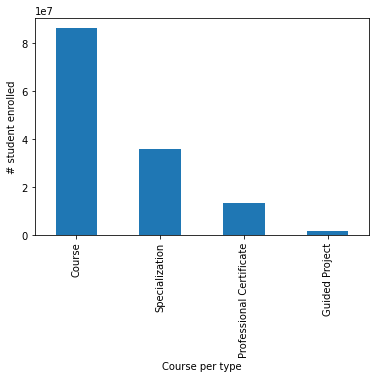

In [52]:
typeVSstudent.plot.bar()
plt.xlabel("Course per type")
plt.ylabel("# student enrolled")
#plt.title("Number of student per certification type")
plt.savefig('students', bbox_inches='tight')
plt.show()

In [25]:
difficultyVSstudent = new_data.groupby("course_difficulty")["course_students_enrolled"].sum()
difficultyVSstudent

course_difficulty
Advanced         4203904
Beginner        96094529
Intermediate    20620468
Mixed           16765789
Name: course_students_enrolled, dtype: int32

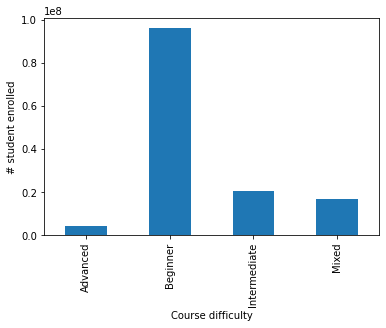

In [26]:
difficultyVSstudent.plot.bar()
plt.xlabel("Course difficulty")
plt.ylabel("# student enrolled")
#plt.title("Number of student per course difficulty")

plt.show()

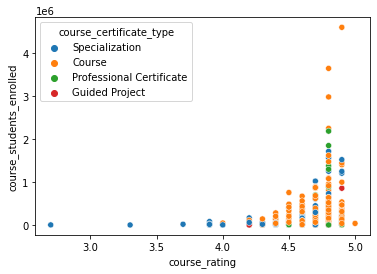

In [27]:
sns.scatterplot(data=new_data, x="course_rating", y="course_students_enrolled", hue="course_certificate_type")
plt.show()

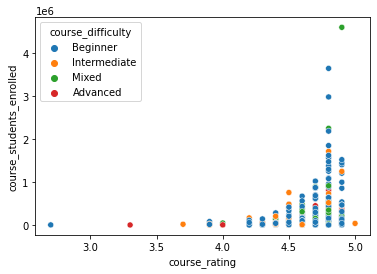

In [28]:
sns.scatterplot(data=new_data, x="course_rating", y="course_students_enrolled", hue="course_difficulty")
plt.show()

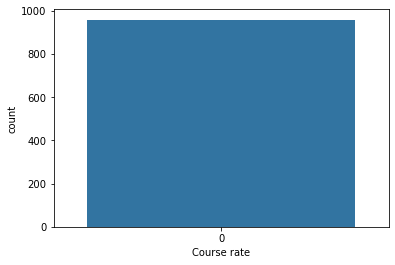

In [29]:
sns.countplot(new_data["course_rating"])
plt.xlabel("Course rate")
#plt.title("Distribition of course rating")
plt.savefig('ratingDistribution', bbox_inches='tight')
plt.show()

In [30]:
rate = new_data[new_data["course_rating"] >= 4]
rate.shape

(951, 12)

In [31]:
rate_prop = 951/958 * 100
rate_prop

99.26931106471815

In [32]:
skills = new_data["course_skills"].value_counts()
#skills

In [33]:
summary = new_data["course_summary"].value_counts()
#summary

In [34]:
description = new_data["course_description"].value_counts()
#description